In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn plotly streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.8 MB/s eta 0:00:00


loading and preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#dataset
url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df=pd.read_csv(url)

#metadata(name,artist) for display and audio features for clustering
metadata_cols=['track_name','track_artist','track_album_name','playlist_genre']
audio_cols=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#dropping duplicates and null values
df=df.drop_duplicates(subset=['track_name','track_artist'])
df=df.dropna(subset=audio_cols)

#scaling audio features 0-1 to avoid feature domination
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(df[audio_cols])

#dataframe for scaled features
df_scaled=pd.DataFrame(scaled_features,columns=audio_cols)
print(f"Dataset loaded successfully with {df.shape[0]} values")
df.head(10)

Dataset loaded successfully with 26230 values


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


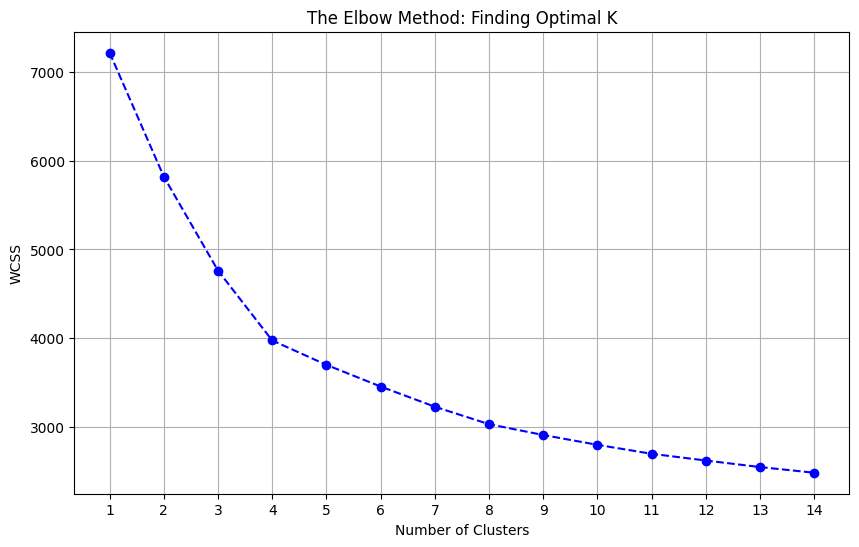

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#storing within cluster sum of square
wcss=[]
k_range=range(1,15)

for k in k_range:
    #running k-means for each k
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

#plotting
plt.figure(figsize=(10,6))
plt.plot(k_range,wcss,marker='o',linestyle='--',color='b')
plt.title('The Elbow Method: Finding Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

clustering

In [4]:
#k-means
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=6,random_state=42)
clusters=kmeans.fit_predict(df_scaled)

#adding cluster labels to original dataframe
df['cluster']=clusters
df_scaled['cluster']=clusters

#analyzing clusters to give mood names
#calculating average score of features for each cluster to name them
cluster_stats=df_scaled.groupby('cluster').mean()

def get_mood_name(row):
    if row['energy']>0.7 and row['valence']>0.6:
        return "High Energy and Happy"
    elif row['energy']>0.7 and row['valence']<0.4:
        return "Aggressive or Intense"
    elif row['acousticness']>0.6 and row['valence']<0.4:
        return "Sad or Melancholic"
    elif row['acousticness']>0.5 and row['valence']>0.5:
        return "Chill or Relaxed"
    elif row['danceability']>0.7:
        return "Dance or Party"
    else:
        return "Calm or Focused"

#naming
cluster_names=cluster_stats.apply(get_mood_name,axis=1)
mood_mapping=cluster_names.to_dict()
df['mood_label']=df['cluster'].map(mood_mapping)

print("Clustering is completed!, Detected moods from the dataset are:\n")
print(cluster_names)

Clustering is completed!, Detected moods from the dataset are:

cluster
0           Dance or Party
1    Aggressive or Intense
2          Calm or Focused
3       Sad or Melancholic
4    Aggressive or Intense
5    High Energy and Happy
dtype: object


In [10]:
import plotly.graph_objects as go

#calculating average values for each cluster
cluster_means=df_scaled.groupby('cluster').mean().reset_index()

#defining the features
categories=['energy','valence','danceability','acousticness','instrumentalness']
fig=go.Figure()

#adding layer to chart
for i,row in cluster_means.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row[feat] for feat in categories],
        theta=categories,
        fill='toself',
        name=f'Cluster {row["cluster"]}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,range=[0,1])),
    showlegend=True,
    title="Average audio features by cluster"
)
fig.show()

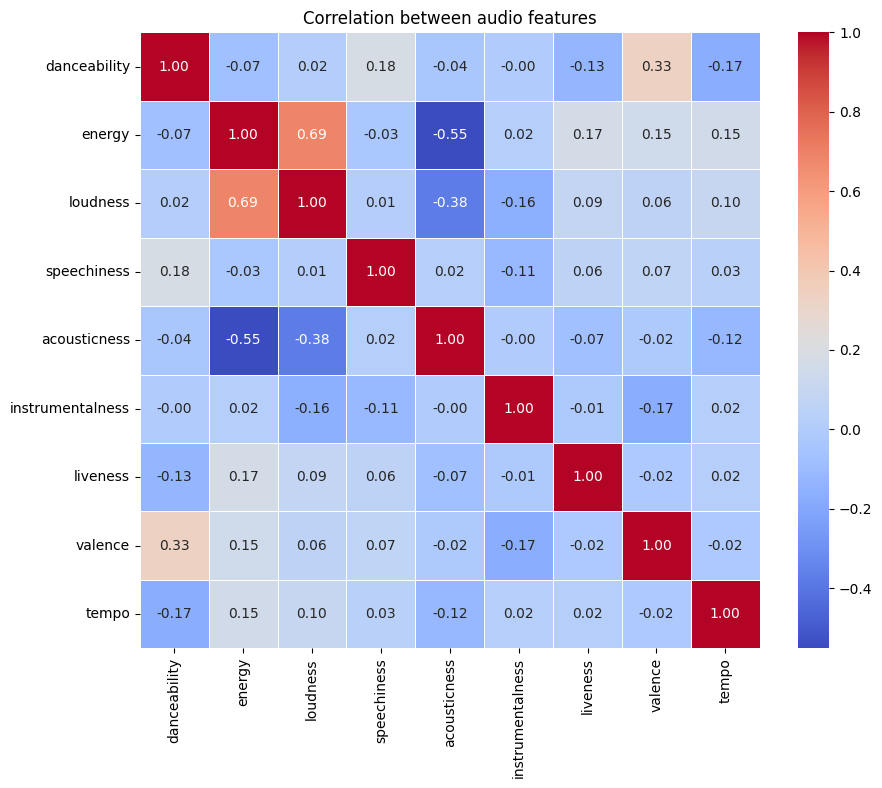

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
corr_matrix=df[audio_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation between audio features')
plt.show()

pca and visualization

In [5]:
#pca and visualization
import plotly.express as px
from sklearn.decomposition import PCA

#reducing
pca=PCA(n_components=3)
pca_components=pca.fit_transform(df_scaled.drop('cluster',axis=1))

#creating dataframe for plotting
df['pca1']=pca_components[:,0]
df['pca2']=pca_components[:,1]
df['pca3']=pca_components[:,2]

#plot
fig=px.scatter_3d(
    df.head(26230),
    x='pca1',y='pca2',z='pca3',
    color='mood_label',
    hover_data=['track_name','track_artist'],
    title='3D Visualization of Song Clusters(Moods)'
)
fig.show()

streamlit creation

In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

st.set_page_config(page_title="Vibelytics",page_icon="🎵",layout="wide")

#loading data
@st.cache_data
def load_data():
    url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
    df=pd.read_csv(url)
    audio_cols=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

    #cleaning and preprocessing
    df=df.drop_duplicates(subset=['track_name','track_artist']).dropna(subset=audio_cols)
    df=df.reset_index(drop=True)

    scaler=MinMaxScaler()
    scaled_features=scaler.fit_transform(df[audio_cols])

    #clustering
    kmeans=KMeans(n_clusters=6,random_state=42)
    df['cluster']=kmeans.fit_predict(scaled_features)

    #cluster Names
    cluster_names={
        0:"Chill/Relaxed", 1:"High Energy/Party",
        2:"Sad/Melancholic", 3:"Aggressive/Intense",
        4:"Happy/Pop", 5:"Danceable/Groovy"
    }
    return df,scaled_features,audio_cols

df,scaled_features,audio_cols=load_data()

def plot_radar_chart(song_data,features):
    categories=['energy','danceability','acousticness','valence','instrumentalness']
    fig=go.Figure()
    fig.add_trace(go.Scatterpolar(r=[song_data[cat] for cat in categories],theta=categories,fill='toself',name='Song DNA',line_color='#1DB954'))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=False)
    return fig

#UI
st.title("🎵 Vibelytics: Your Music Search Engine 🎵")
st.markdown("""<style>.big-font { font-size:20px !important; }</style>""",unsafe_allow_html=True)
st.markdown('<p class="big-font">Discover your favourite Music</p>', unsafe_allow_html=True)

#tabs
tab1,tab2=st.tabs(["🔍 Search by Song","🎛️ Discover by Vibe"])

#by search
with tab1:
    col1,col2=st.columns([1,2])
    with col1:
        st.subheader("🔍 Find a Song 🔍")
        song_input=st.text_input("Type a song name:")
        search_btn=st.button("Analyze & Recommend",type="primary")

    if search_btn:
        match=df[df['track_name'].str.contains(song_input,case=False,na=False)]
        if match.empty:
            st.error("Sorry, Song not found! Try 'Blinding Lights' or 'Someone Like You'")
        else:
            song_row=match.iloc[0]
            song_index=song_row.name

            #displaying selected songs
            with col2:
                st.success(f"{song_row['track_name']} - {song_row['track_artist']}")
                #radar chart
                scaler=MinMaxScaler()
                input_scaled=scaled_features[song_index]
                #dictionary for plotting
                plot_data=dict(zip(audio_cols,input_scaled))
                st.plotly_chart(plot_radar_chart(plot_data,audio_cols),use_container_width=True)

            #recommendations
            st.markdown("---")
            st.subheader("🎧 Recommended Playlist 🎧")

            #getting cluster and distances
            current_cluster=song_row['cluster']
            cluster_indices=df[df['cluster']==current_cluster].index
            cluster_features=scaled_features[cluster_indices]
            input_feature=scaled_features[song_index].reshape(1,-1)
            distances=euclidean_distances(input_feature, cluster_features)

            #results
            results=df.loc[cluster_indices].copy()
            results['distance']=distances[0]
            results=results.sort_values('distance').iloc[1:21]

            #display layout
            cols=st.columns(3)
            for idx,(i,row) in enumerate(results.iterrows()):
                with cols[idx%3]:
                    st.markdown(f"**{row['track_name']}**")
                    st.caption(f"*{row['track_artist']}*")
                    st.progress(int(row['energy']*100),text="Energy Level")
                    spotify_url=f"https://open.spotify.com/track/{row['track_id']}"
                    st.markdown(f"[Listen on Spotify 🟢]({spotify_url})")
                    st.markdown("---")

#by vibe
with tab2:
    st.subheader("🎛️ Dial within your Mood 🎛️")
    st.markdown("Don't have a song in mind? Adjust the sliders to generate a playlist.")

    c1,c2,c3=st.columns(3)
    with c1:
        target_energy=st.slider("Energy (Calm -> Hype)",0.0,1.0,0.5)
    with c2:
        target_valence=st.slider("Mood (Sad -> Happy)",0.0,1.0,0.5)
    with c3:
        target_dance=st.slider("Danceability (Sit -> Dance)",0.0,1.0,0.5)

    if st.button("Generate Playlist"):
        synthetic_vector=[target_dance,target_energy,0.5,0.5,0.5,0.5,0.5,target_valence,0.5]
        #calculating distance from song to all real songs
        distances=euclidean_distances([synthetic_vector],scaled_features)
        #closest matches
        df['vibe_distance']=distances[0]
        vibe_results=df.sort_values('vibe_distance').head(20)
        st.success("Here is your custom generated playlist")
        st.dataframe(
            vibe_results[['track_name','track_artist','track_album_name']],
            hide_index=True,
            use_container_width=True
        )

Overwriting app.py


In [46]:
#running streamlit with Ngrok
from pyngrok import ngrok
import subprocess
import time

#killing previous processes to avoid conflicts
!pkill -f streamlit

#authentication
ngrok.set_auth_token("35hXnncogfy4FWwuQhBtstQFFet_4J4jDjNzty6fb7ejR9ZWe")

#running streamlit in background
process=subprocess.Popen(["streamlit","run","app.py"])
time.sleep(5)

try:
    public_url=ngrok.connect(8501).public_url
    print(f"Click on URL: {public_url}")
except Exception as e:
    print(f"Error: {e}")

try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("App is stopped!")

Click on URL: https://radiochemical-cynthia-extrinsic.ngrok-free.dev
App is stopped!
